In [ ]:
import tensorflow as tf 

About Dataset

**Context**

This is image data of Natural Scenes around the world.

**Content**


This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.

This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

Acknowledgements
Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

**Inspiration**

Want to build powerful Neural Network that can classify these images with more accuracy.


For the first model, I used tiny vgg architecture.

Then I used 3 models from TensorFlow Hub:

mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


With the efficientnet_model, I reached to above 93% val_accuracy, which make it the best model between 3.

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d puneet6060/intel-image-classification

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 346M/346M [00:15<00:00, 24.6MB/s]
100% 346M/346M [00:15<00:00, 22.8MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("intel-image-classification.zip")
zip_ref.extractall("intel-image-classification")
zip_ref.close()

In [ ]:
# Walk through intel-image-classification directory and list number of files
import os
for dirpath, dirnames, filenames in os.walk("intel-image-classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'intel-image-classification'.
There are 1 directories and 0 images in 'intel-image-classification/seg_train'.
There are 6 directories and 0 images in 'intel-image-classification/seg_train/seg_train'.
There are 0 directories and 2191 images in 'intel-image-classification/seg_train/seg_train/buildings'.
There are 0 directories and 2382 images in 'intel-image-classification/seg_train/seg_train/street'.
There are 0 directories and 2274 images in 'intel-image-classification/seg_train/seg_train/sea'.
There are 0 directories and 2512 images in 'intel-image-classification/seg_train/seg_train/mountain'.
There are 0 directories and 2404 images in 'intel-image-classification/seg_train/seg_train/glacier'.
There are 0 directories and 2271 images in 'intel-image-classification/seg_train/seg_train/forest'.
There are 1 directories and 0 images in 'intel-image-classification/seg_pred'.
There are 0 directories and 7301 images in 'intel-image-classification/seg_pre

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("intel-image-classification/seg_train/seg_train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import numpy as np
  
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  img = cv2.resize(img, (224, 224))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (224, 224, 3)


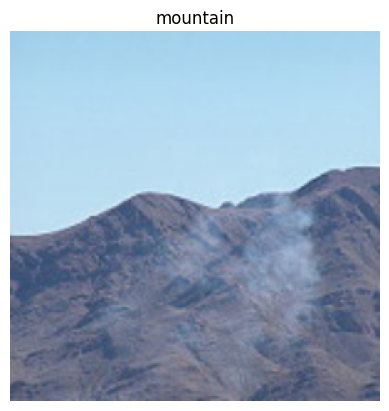

In [ ]:
img = view_random_image(target_dir="intel-image-classification/seg_train/seg_train/",
                        target_class="mountain")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "intel-image-classification/seg_train/seg_train/"
test_dir = "intel-image-classification/seg_test/seg_test/" 

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6, activation="softmax") 
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
439/439 [==============================] - 52s 87ms/step - loss: 0.9880 - accuracy: 0.6184 - val_loss: 0.9155 - val_accuracy: 0.6493
Epoch 2/5
439/439 [==============================] - 34s 77ms/step - loss: 0.6936 - accuracy: 0.7463 - val_loss: 0.7760 - val_accuracy: 0.7097
Epoch 3/5
439/439 [==============================] - 34s 77ms/step - loss: 0.4896 - accuracy: 0.8251 - val_loss: 0.7657 - val_accuracy: 0.7323
Epoch 4/5
439/439 [==============================] - 32s 74ms/step - loss: 0.3216 - accuracy: 0.8919 - val_loss: 0.9505 - val_accuracy: 0.7010
Epoch 5/5
439/439 [==============================] - 32s 73ms/step - loss: 0.2014 - accuracy: 0.9337 - val_loss: 1.0768 - val_accuracy: 0.7183


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.legend()

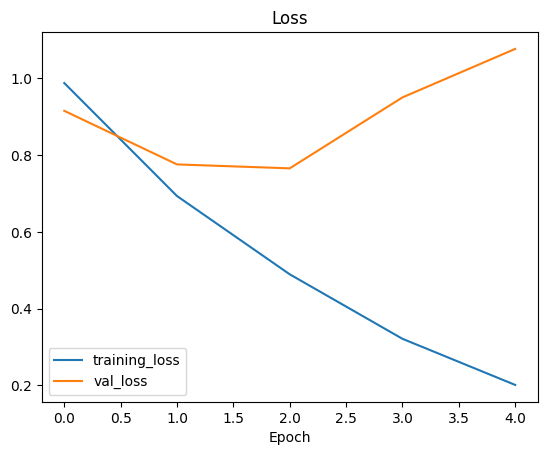

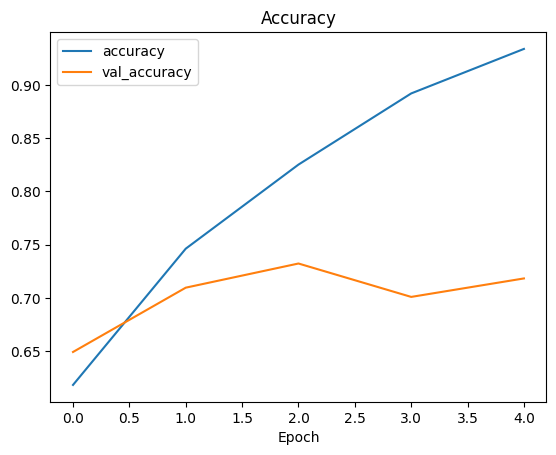

In [ ]:
plot_loss_curves(history_1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import numpy as np
  
def view_and_predict(target_folder):
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  img = cv2.resize(img, (224, 224))
  plt.imshow(img)
  plt.title("Predict")
  plt.axis("off");

  predict_arg = model_1.predict(
    tf.expand_dims(img/255., axis=0),
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
  )
  print(f" Prediction: This is a {class_names[predict_arg.argmax()]}")
  return img



1/1 [==============================] - 0s 19ms/step
 Prediction: This is a buildings


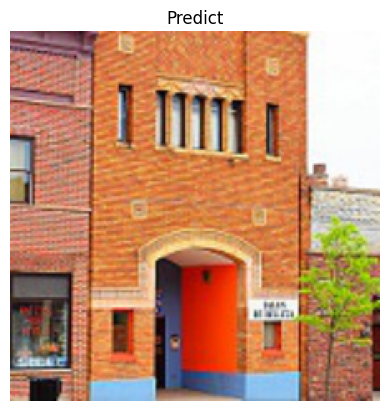

In [ ]:
img = view_and_predict(target_folder="intel-image-classification/seg_pred/seg_pred/")

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


IMAGE_SHAPE = (224, 224)

In [ ]:
def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extractor_layer",
                                           input_shape=IMAGE_SHAPE+(3,))
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [ ]:
mobilenet_model = create_model(mobilenet_url, num_classes=train_data.num_classes)
mobilenet_model.compile(loss="categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])
mobilenet_history = mobilenet_model.fit(train_data,
                                        epochs=5,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 40s 81ms/step - loss: 0.3455 - accuracy: 0.8746 - val_loss: 0.2497 - val_accuracy: 0.9117
Epoch 2/5
439/439 [==============================] - 33s 76ms/step - loss: 0.2248 - accuracy: 0.9185 - val_loss: 0.2468 - val_accuracy: 0.9073
Epoch 3/5
439/439 [==============================] - 34s 76ms/step - loss: 0.1982 - accuracy: 0.9295 - val_loss: 0.2330 - val_accuracy: 0.9123
Epoch 4/5
439/439 [==============================] - 38s 87ms/step - loss: 0.1837 - accuracy: 0.9324 - val_loss: 0.2346 - val_accuracy: 0.9147
Epoch 5/5
439/439 [==============================] - 35s 80ms/step - loss: 0.1701 - accuracy: 0.9379 - val_loss: 0.2320 - val_accuracy: 0.9160


In [ ]:
efficientnet_model = create_model(model_url=efficientnet_url, 
                                  num_classes=train_data.num_classes)
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 49s 89ms/step - loss: 0.3203 - accuracy: 0.8976 - val_loss: 0.2227 - val_accuracy: 0.9197
Epoch 2/5
439/439 [==============================] - 36s 82ms/step - loss: 0.1943 - accuracy: 0.9319 - val_loss: 0.2047 - val_accuracy: 0.9280
Epoch 3/5
439/439 [==============================] - 37s 84ms/step - loss: 0.1731 - accuracy: 0.9405 - val_loss: 0.1992 - val_accuracy: 0.9300
Epoch 4/5
439/439 [==============================] - 36s 82ms/step - loss: 0.1596 - accuracy: 0.9454 - val_loss: 0.1917 - val_accuracy: 0.9300
Epoch 5/5
439/439 [==============================] - 36s 81ms/step - loss: 0.1485 - accuracy: 0.9476 - val_loss: 0.1924 - val_accuracy: 0.9307


In [ ]:
resnet_model = create_model(model_url=resnet_url, 
                                  num_classes=train_data.num_classes)
resnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])
resnet_history = resnet_model.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 54s 112ms/step - loss: 0.3234 - accuracy: 0.8834 - val_loss: 0.2197 - val_accuracy: 0.9167
Epoch 2/5
439/439 [==============================] - 45s 103ms/step - loss: 0.1998 - accuracy: 0.9267 - val_loss: 0.2223 - val_accuracy: 0.9113
Epoch 3/5
439/439 [==============================] - 45s 103ms/step - loss: 0.1733 - accuracy: 0.9354 - val_loss: 0.2072 - val_accuracy: 0.9190
Epoch 4/5
439/439 [==============================] - 46s 104ms/step - loss: 0.1543 - accuracy: 0.9441 - val_loss: 0.2026 - val_accuracy: 0.9237
Epoch 5/5
439/439 [==============================] - 46s 104ms/step - loss: 0.1390 - accuracy: 0.9505 - val_loss: 0.2050 - val_accuracy: 0.9207
